In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID', axis=1, inplace=True)
encoder=LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

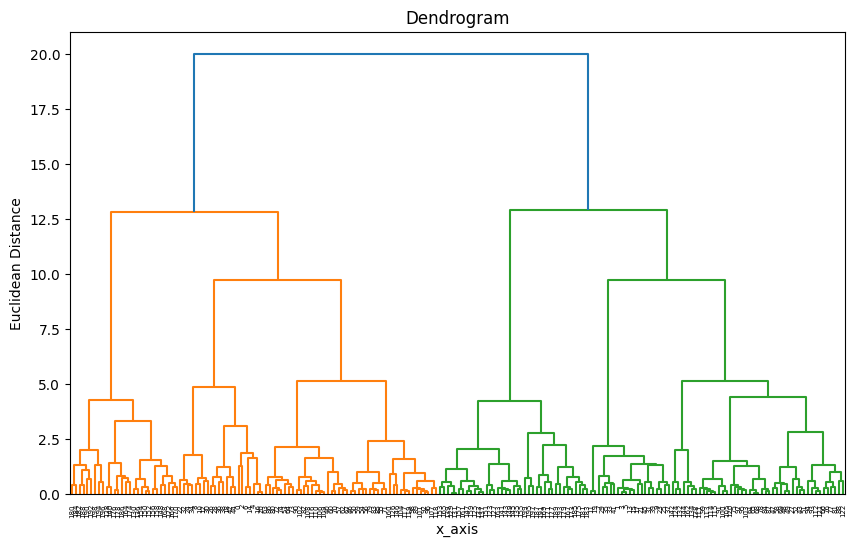

In [3]:

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('x_axis')
plt.ylabel('Euclidean Distance')
plt.show()


In [4]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df['Cluster'] = hc.fit_predict(X_scaled)


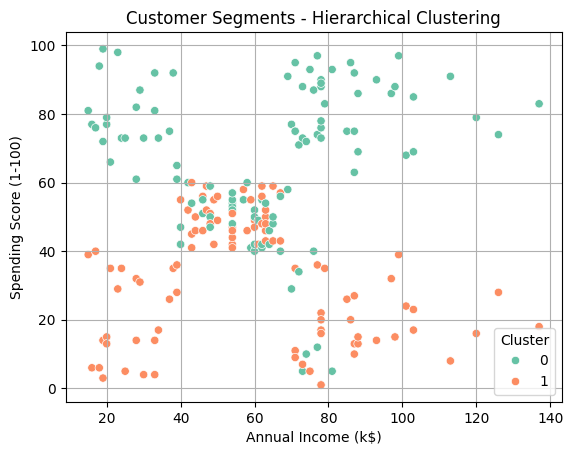

In [5]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title("Customer Segments - Hierarchical Clustering")
plt.grid(True)
plt.show()
